# Cluster model (K-means)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Importing-the-data" data-toc-modified-id="Importing-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing the data</a></span></li><li><span><a href="#Preprocessing-the-data" data-toc-modified-id="Preprocessing-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocessing the data</a></span><ul class="toc-item"><li><span><a href="#Dropping-duplicate-index-column" data-toc-modified-id="Dropping-duplicate-index-column-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dropping duplicate index column</a></span></li><li><span><a href="#Reducing-number-of-items-in-brand-column" data-toc-modified-id="Reducing-number-of-items-in-brand-column-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Reducing number of items in brand column</a></span></li><li><span><a href="#Get-dummies-for-brand-column" data-toc-modified-id="Get-dummies-for-brand-column-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Get dummies for brand column</a></span></li><li><span><a href="#New-dataframe-(numerical-columns-only)" data-toc-modified-id="New-dataframe-(numerical-columns-only)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>New dataframe (numerical columns only)</a></span></li><li><span><a href="#Dealing-with-null-values" data-toc-modified-id="Dealing-with-null-values-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Dealing with null values</a></span></li><li><span><a href="#Scaling-the-data" data-toc-modified-id="Scaling-the-data-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Scaling the data</a></span></li></ul></li><li><span><a href="#Model-building" data-toc-modified-id="Model-building-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model building</a></span><ul class="toc-item"><li><span><a href="#First-run-(k=3)" data-toc-modified-id="First-run-(k=3)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>First run (k=3)</a></span></li><li><span><a href="#Chosing-the-best-k" data-toc-modified-id="Chosing-the-best-k-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Chosing the best k</a></span></li><li><span><a href="#Silhouette-score" data-toc-modified-id="Silhouette-score-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Silhouette score</a></span></li><li><span><a href="#Final-model-(k=8)" data-toc-modified-id="Final-model-(k=8)-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Final model (k=8)</a></span></li></ul></li></ul></div>

## Libraries

In [80]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

## Importing the data

In [81]:
df = pd.read_csv('final_df.csv')

In [82]:
df.shape

(1232, 16)

In [83]:
df.head()

,Unnamed: 0,product,brand,price,weight,kj,kcal,fat,sat_fat,carbs,sugar,fibre,protein,salt,product_link,photo_link
0,0,Soja Protein Crispies 58 % mit Kakao,Koro,14.0,1.0,1535.0,362.0,19.0,4.0,282.0,91.0,18.0,58.0,27.0,https://www.korodrogerie.de/soja-protein-crisp...,https://koro2.imgix.net/media/image/f1/50/81/C...
1,1,Schokodrops mit Xylit,Koro,21.0,1.0,2290.0,555.0,46.0,28.0,31.0,10.0,10.0,92.0,7.0,https://www.korodrogerie.de/schokodrops-mit-xy...,https://koro2.imgix.net/media/image/2c/01/f8/S...
2,2,Schoko Protein Crunchies ohne Zuckerzusatz,Koro,20.0,1.0,1875.0,448.0,28.0,12.0,37.0,14.0,83.0,21.0,36.0,https://www.korodrogerie.de/schoko-protein-cru...,https://koro2.imgix.net/media/image/30/78/62/P...
3,3,Soja Protein Crispies 60 %,Koro,13.0,1.0,1541.0,363.0,18.0,2.0,26.0,8.0,8.0,60.0,32.0,https://www.korodrogerie.de/soja-protein-crisp...,https://koro2.imgix.net/media/image/84/55/ca/C...
4,4,Bohnen-Erbsen-Mix geröstet & gesalzen,Koro,11.5,1.0,1766.0,421.0,14.0,23.0,35.0,67.0,10.0,33.0,10.0,https://www.korodrogerie.de/bohnen-erbsen-mix-...,https://koro2.imgix.net/media/image/a9/37/79/B...


## Preprocessing the data

### Dropping duplicate index column

In [84]:
df = df.drop('Unnamed: 0', axis=1)

### Reducing number of items in brand column

In [85]:
pd.set_option('display.max_rows', 20)

In [86]:
brand_count = pd.DataFrame(df['brand'].value_counts()).reset_index()
brand_count

,index,brand
0,Koro,221
1,Foodist,96
2,mind sweets,40
3,Plamil,30
4,Heimatgut,29
5,Lovechock,28
6,Lini's Bites,27
7,Vivani,27
8,Moo Free,26
9,Rapunzel,20


In [87]:
keep_brands = brand_count['index'][brand_count['brand']>10].to_list()

In [88]:
len(keep_brands)

34

In [89]:
def clean_brand(col, lst_brands=[]):
    
    brand_new = []
    
    for p in col:
        if p not in lst_brands:
            brand_new.append('Other')
        else:
            brand_new.append(p)
    
    return brand_new

In [90]:
df['brand_new'] = clean_brand(df['brand'], lst_brands=keep_brands)
df['brand_new'].value_counts()

Other                  338
Koro                   221
Foodist                 96
mind sweets             40
Plamil                  30
Heimatgut               29
Lovechock               28
Vivani                  27
Lini's Bites            27
Moo Free                26
                      ... 
Wally & Whiz            12
PURmacherei             12
Vitaina Italia          12
Banabar                 12
N.A! Nature Addicts     12
le pain des fleurs      12
Dörrwerk                12
Bernsteinzimmer         12
rosmarin BIOBACK        11
Vantastic Foods         11
Name: brand_new, Length: 35, dtype: int64

### Get dummies for brand column

In [91]:
df_new = pd.get_dummies(df, columns=['brand_new'])
df_new.head()

,product,brand,price,weight,kj,kcal,fat,sat_fat,carbs,sugar,...,brand_new_Vitaina Italia,brand_new_Vivani,brand_new_Wally & Whiz,brand_new_Zebra,brand_new_Zotter,brand_new_go4raw,brand_new_le pain des fleurs,brand_new_mind sweets,brand_new_rosmarin BIOBACK,brand_new_ÖKOVITAL
0,Soja Protein Crispies 58 % mit Kakao,Koro,14.0,1.0,1535.0,362.0,19.0,4.0,282.0,91.0,...,0,0,0,0,0,0,0,0,0,0
1,Schokodrops mit Xylit,Koro,21.0,1.0,2290.0,555.0,46.0,28.0,31.0,10.0,...,0,0,0,0,0,0,0,0,0,0
2,Schoko Protein Crunchies ohne Zuckerzusatz,Koro,20.0,1.0,1875.0,448.0,28.0,12.0,37.0,14.0,...,0,0,0,0,0,0,0,0,0,0
3,Soja Protein Crispies 60 %,Koro,13.0,1.0,1541.0,363.0,18.0,2.0,26.0,8.0,...,0,0,0,0,0,0,0,0,0,0
4,Bohnen-Erbsen-Mix geröstet & gesalzen,Koro,11.5,1.0,1766.0,421.0,14.0,23.0,35.0,67.0,...,0,0,0,0,0,0,0,0,0,0


### New dataframe (numerical columns only)

In [96]:
df_model = df_new.select_dtypes(np.number)

In [97]:
df_model.head()

,price,weight,kj,kcal,fat,sat_fat,carbs,sugar,fibre,protein,...,brand_new_Vitaina Italia,brand_new_Vivani,brand_new_Wally & Whiz,brand_new_Zebra,brand_new_Zotter,brand_new_go4raw,brand_new_le pain des fleurs,brand_new_mind sweets,brand_new_rosmarin BIOBACK,brand_new_ÖKOVITAL
0,14.0,1.0,1535.0,362.0,19.0,4.0,282.0,91.0,18.0,58.0,...,0,0,0,0,0,0,0,0,0,0
1,21.0,1.0,2290.0,555.0,46.0,28.0,31.0,10.0,10.0,92.0,...,0,0,0,0,0,0,0,0,0,0
2,20.0,1.0,1875.0,448.0,28.0,12.0,37.0,14.0,83.0,21.0,...,0,0,0,0,0,0,0,0,0,0
3,13.0,1.0,1541.0,363.0,18.0,2.0,26.0,8.0,8.0,60.0,...,0,0,0,0,0,0,0,0,0,0
4,11.5,1.0,1766.0,421.0,14.0,23.0,35.0,67.0,10.0,33.0,...,0,0,0,0,0,0,0,0,0,0


### Dealing with null values

In [107]:
df_model.isna().sum().sort_values(ascending=False)

fibre                        707
salt                          83
protein                       15
fat                           13
sat_fat                       13
sugar                          4
carbs                          1
weight                         1
brand_new_Plamil               0
brand_new_Taste of Nature      0
                            ... 
brand_new_Dörrwerk             0
brand_new_Foodist              0
brand_new_Green & More         0
brand_new_Heimatgut            0
brand_new_Koro                 0
brand_new_Landgarten           0
brand_new_Lini's Bites         0
brand_new_Lovechock            0
brand_new_MYLKCHOCY            0
brand_new_ÖKOVITAL             0
Length: 46, dtype: int64

In [108]:
def per_NaN_columns(df):
    nulls = pd.DataFrame(df.isna().sum()*100/len(df), columns=['percentage_nulls'])
    nulls = nulls.sort_values('percentage_nulls', ascending = False)
    return nulls

In [109]:
nulls = per_NaN_columns(df_model)
nulls

,percentage_nulls
fibre,57.386364
salt,6.737013
protein,1.217532
fat,1.055195
sat_fat,1.055195
sugar,0.324675
carbs,0.081169
weight,0.081169
brand_new_Plamil,0.000000
brand_new_Taste of Nature,0.000000


**Conclusion:**
- the percentage of null-values for fibre is too high = column will be dropped
- all other null-values will be replaced by the mean of the column

In [110]:
def fill_NaN(df):
    for col in df:
        mean_val = df[col].mean()
        df[col] = df[col].fillna(mean_val)    
    return df

In [111]:
df_model = fill_NaN(df_model)

<ipython-input-110-f17deafa6c0a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(mean_val)


In [112]:
df_model.isna().sum().sort_values(ascending=False)

price                            0
brand_new_Taste of Nature        0
brand_new_Moo Free               0
brand_new_N.A! Nature Addicts    0
brand_new_Naturata               0
brand_new_Not Guilty             0
brand_new_Other                  0
brand_new_PURmacherei            0
brand_new_Plamil                 0
brand_new_Rapunzel               0
                                ..
brand_new_Bernsteinzimmer        0
brand_new_Birkengold             0
brand_new_Candy Tree             0
brand_new_Dörrwerk               0
brand_new_Foodist                0
brand_new_Green & More           0
brand_new_Heimatgut              0
brand_new_Koro                   0
brand_new_Landgarten             0
brand_new_ÖKOVITAL               0
Length: 46, dtype: int64

### Scaling the data

In [113]:
df_model_sc = StandardScaler().fit_transform(df_model)
pd.DataFrame(df_model_sc).head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.160098,0.044099,-0.778727,-0.607233,-0.332918,-0.630756,6.640684,0.422128,-0.378846,1.966758,...,-0.099177,-0.149688,-0.099177,-0.121766,-0.114708,-0.11102,-0.099177,-0.183186,-0.094916,-0.114708
1,0.415957,0.044099,0.825917,0.585709,1.153227,1.008224,-0.624905,-0.200754,-0.817785,3.475526,...,-0.099177,-0.149688,-0.099177,-0.121766,-0.114708,-0.11102,-0.099177,-0.183186,-0.094916,-0.114708
2,0.379405,0.044099,-0.056106,-0.075663,0.162464,-0.084429,-0.451226,-0.169994,3.187531,0.324863,...,-0.099177,-0.149688,-0.099177,-0.121766,-0.114708,-0.11102,-0.099177,-0.183186,-0.094916,-0.114708
3,0.123547,0.044099,-0.765975,-0.601052,-0.387960,-0.767337,-0.769638,-0.216133,-0.927519,2.055509,...,-0.099177,-0.149688,-0.099177,-0.121766,-0.114708,-0.11102,-0.099177,-0.183186,-0.094916,-0.114708
4,0.068720,0.044099,-0.287770,-0.242552,-0.608130,0.666770,-0.509119,0.237570,-0.817785,0.857370,...,-0.099177,-0.149688,-0.099177,-0.121766,-0.114708,-0.11102,-0.099177,-0.183186,-0.094916,-0.114708


## Model building

### First run (k=3)

In [115]:
kmeans = KMeans(n_clusters=3, random_state=13)
kmeans.fit(df_model_sc)

KMeans(n_clusters=3, random_state=13)

In [116]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(df_model_sc)
clusters

array([0, 2, 2, ..., 0, 0, 0])

In [117]:
# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    614
1     18
2    600
dtype: int64

In [123]:
# Explore the cluster assignment in the original dataset
df['cluster'] = clusters
df.head()

,product,brand,price,weight,kj,kcal,fat,sat_fat,carbs,sugar,fibre,protein,salt,product_link,photo_link,brand_new,cluster
0,Soja Protein Crispies 58 % mit Kakao,Koro,14.0,1.0,1535.0,362.0,19.0,4.0,282.0,91.0,18.0,58.0,27.0,https://www.korodrogerie.de/soja-protein-crisp...,https://koro2.imgix.net/media/image/f1/50/81/C...,Koro,0
1,Schokodrops mit Xylit,Koro,21.0,1.0,2290.0,555.0,46.0,28.0,31.0,10.0,10.0,92.0,7.0,https://www.korodrogerie.de/schokodrops-mit-xy...,https://koro2.imgix.net/media/image/2c/01/f8/S...,Koro,2
2,Schoko Protein Crunchies ohne Zuckerzusatz,Koro,20.0,1.0,1875.0,448.0,28.0,12.0,37.0,14.0,83.0,21.0,36.0,https://www.korodrogerie.de/schoko-protein-cru...,https://koro2.imgix.net/media/image/30/78/62/P...,Koro,2
3,Soja Protein Crispies 60 %,Koro,13.0,1.0,1541.0,363.0,18.0,2.0,26.0,8.0,8.0,60.0,32.0,https://www.korodrogerie.de/soja-protein-crisp...,https://koro2.imgix.net/media/image/84/55/ca/C...,Koro,2
4,Bohnen-Erbsen-Mix geröstet & gesalzen,Koro,11.5,1.0,1766.0,421.0,14.0,23.0,35.0,67.0,10.0,33.0,10.0,https://www.korodrogerie.de/bohnen-erbsen-mix-...,https://koro2.imgix.net/media/image/a9/37/79/B...,Koro,2


In [119]:
# "performance metric"
kmeans.inertia_

52190.70268396341

### Chosing the best k

In [120]:
kmeans = KMeans(n_clusters=3, random_state=13, verbose=1, n_init=1)
kmeans.fit(df_model_sc)
kmeans.inertia_

Initialization complete
Iteration 0, inertia 89995.18341486741
Iteration 1, inertia 52817.52600672011
Iteration 2, inertia 52545.172105194135
Iteration 3, inertia 52411.66004847464
Iteration 4, inertia 52296.606266690054
Iteration 5, inertia 52235.75025551268
Iteration 6, inertia 52219.12927633711
Iteration 7, inertia 52200.09966613711
Iteration 8, inertia 52191.3127958094
Iteration 9, inertia 52190.70268396341
Converged at iteration 9: strict convergence.


52190.70268396341

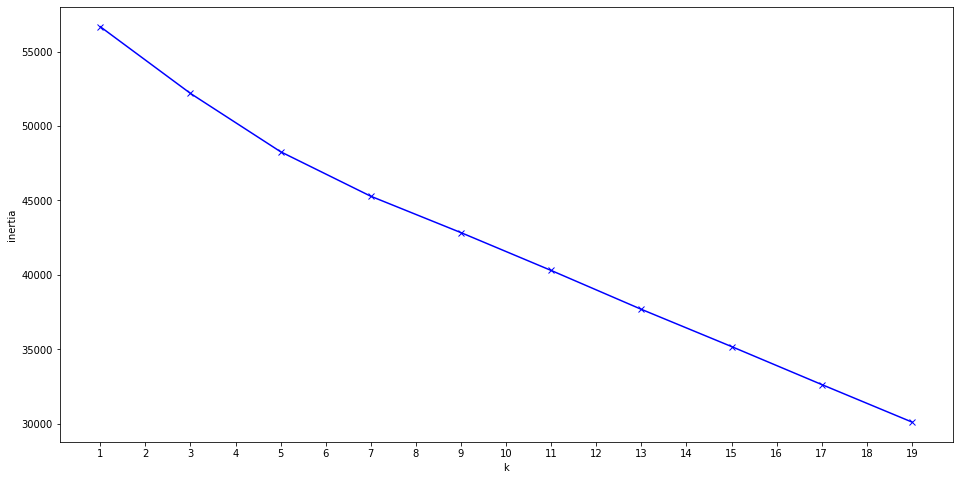

In [121]:
K = range(1, 20, 2)

inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=13)
    kmeans.fit(df_model_sc)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

### Silhouette score

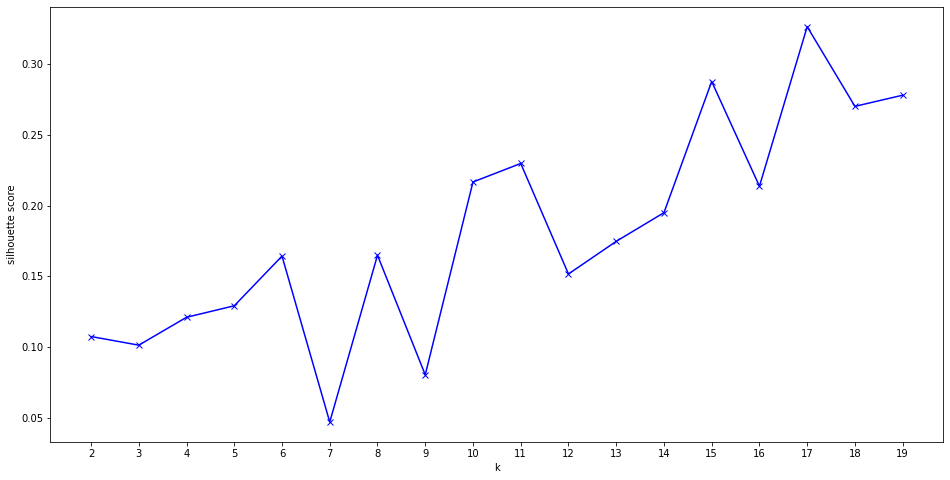

In [122]:
K = range(2, 20)

silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=13)
    kmeans.fit(df_model_sc)
    silhouette.append(silhouette_score(df_model_sc, kmeans.predict(df_model_sc)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

### Final model (k=8)

In [124]:
kmeans = KMeans(n_clusters=8, random_state=13)
kmeans.fit(df_model_sc)

KMeans(random_state=13)

In [125]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(df_model_sc)
clusters

array([1, 1, 1, ..., 2, 2, 2])

In [126]:
# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0     16
1    203
2    468
3     28
4     19
5    467
6      1
7     30
dtype: int64

In [127]:
# Explore the cluster assignment in the original dataset
df['cluster'] = clusters
df.head()

,product,brand,price,weight,kj,kcal,fat,sat_fat,carbs,sugar,fibre,protein,salt,product_link,photo_link,brand_new,cluster
0,Soja Protein Crispies 58 % mit Kakao,Koro,14.0,1.0,1535.0,362.0,19.0,4.0,282.0,91.0,18.0,58.0,27.0,https://www.korodrogerie.de/soja-protein-crisp...,https://koro2.imgix.net/media/image/f1/50/81/C...,Koro,1
1,Schokodrops mit Xylit,Koro,21.0,1.0,2290.0,555.0,46.0,28.0,31.0,10.0,10.0,92.0,7.0,https://www.korodrogerie.de/schokodrops-mit-xy...,https://koro2.imgix.net/media/image/2c/01/f8/S...,Koro,1
2,Schoko Protein Crunchies ohne Zuckerzusatz,Koro,20.0,1.0,1875.0,448.0,28.0,12.0,37.0,14.0,83.0,21.0,36.0,https://www.korodrogerie.de/schoko-protein-cru...,https://koro2.imgix.net/media/image/30/78/62/P...,Koro,1
3,Soja Protein Crispies 60 %,Koro,13.0,1.0,1541.0,363.0,18.0,2.0,26.0,8.0,8.0,60.0,32.0,https://www.korodrogerie.de/soja-protein-crisp...,https://koro2.imgix.net/media/image/84/55/ca/C...,Koro,1
4,Bohnen-Erbsen-Mix geröstet & gesalzen,Koro,11.5,1.0,1766.0,421.0,14.0,23.0,35.0,67.0,10.0,33.0,10.0,https://www.korodrogerie.de/bohnen-erbsen-mix-...,https://koro2.imgix.net/media/image/a9/37/79/B...,Koro,1


In [128]:
# "performance metric"
kmeans.inertia_

44225.96278791482

In [31]:
print(classification_report(y, new_df['cluster']))

NameError: name 'y' is not defined